In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import random
import seaborn as sns
!pip install chart-studio
import chart_studio
import chart_studio.plotly as py
chart_studio.tools.set_credentials_file(username='tuenguyen92', api_key='slYjvo1SuYBSJrDEieDa')

In [19]:
#reading csv file

combined_countries= pd.read_csv("Happiness avg.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Happiness avg.csv'

In [ ]:
combined_countries=combined_countries.dropna()

In [ ]:
combined_countries_without_year = combined_countries[['Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']]

In [ ]:
combined_countries_without_year.describe()

In [20]:
score_per_country = combined_countries.set_index(["Country or region"])["Score"]

In [21]:
score_per_country

Country or region
Finland        7.8087
Denmark        7.6456
Switzerland    7.5599
Iceland        7.5045
Norway         7.4880
                ...  
Lesotho        3.5120
Botswana       3.4670
Rwanda         3.4150
Zimbabwe       3.1450
Afghanistan    2.5230
Name: Score, Length: 302, dtype: float64

In [22]:
combined_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country or region             302 non-null    object 
 1   Score                         302 non-null    float64
 2   GDP per capita                302 non-null    float64
 3   Social support                302 non-null    float64
 4   Healthy life expectancy       302 non-null    float64
 5   Freedom to make life choices  302 non-null    float64
 6   Generosity                    302 non-null    float64
 7   Perceptions of corruption     302 non-null    float64
 8   Year                          302 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 21.4+ KB


In [23]:
#separating the happiness score by year 

score_2020 = combined_countries[(combined_countries["Year"] == 2020)]
score_2021 = combined_countries[(combined_countries["Year"] == 2021)]

In [24]:
#Grouping by "country" and taking the mean of each.

country_score_2020 = score_2020.groupby(["Country or region"]).mean ()["Score"]
country_score_2021 = score_2021.groupby(["Country or region"]).mean ()["Score"]

In [25]:
scores_by_year = pd.DataFrame({
    "2020": country_score_2020,
    "2021": country_score_2021})

In [26]:
scores_by_year

,2020,2021
Country or region,,
Afghanistan,2.5669,2.523
Albania,4.8827,5.117
Algeria,5.0051,4.887
Argentina,5.9747,5.929
Armenia,4.6768,5.283
...,...,...
Venezuela,5.0532,4.892
Vietnam,5.3535,5.411
Yemen,3.5274,3.658


In [13]:
#Part II. Visualization

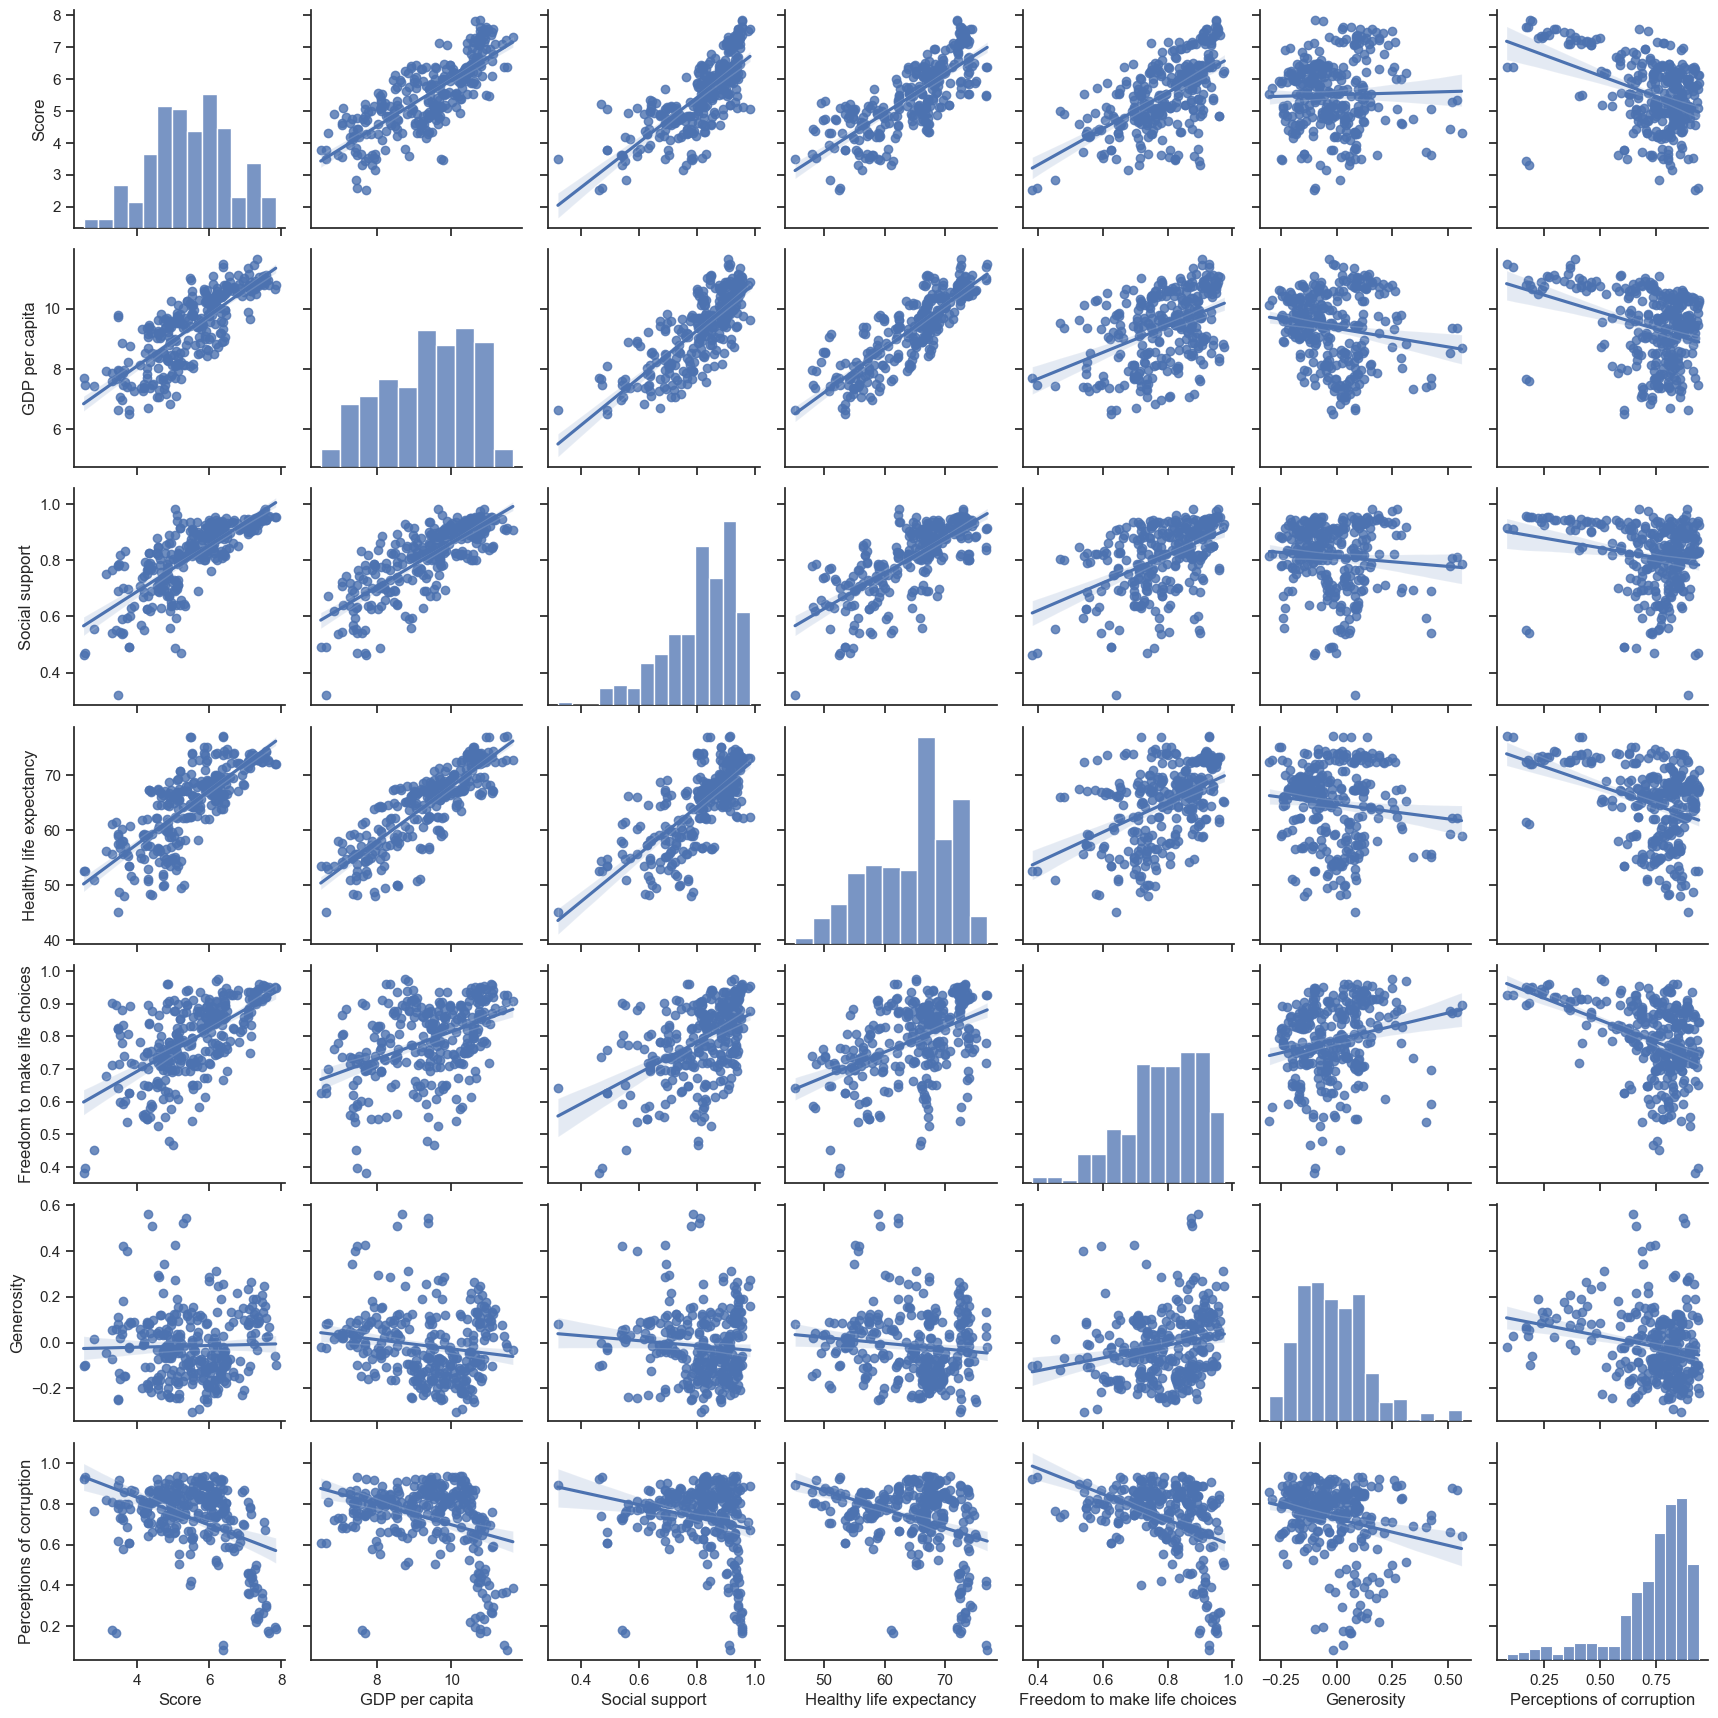

In [14]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(combined_countries_without_year, kind="reg")

/var/folders/yl/gzl4lyxx6jn5hj9q03gc0z200000gn/T/ipykernel_37360/3104655442.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = combined_countries_without_year.corr()


<AxesSubplot:>

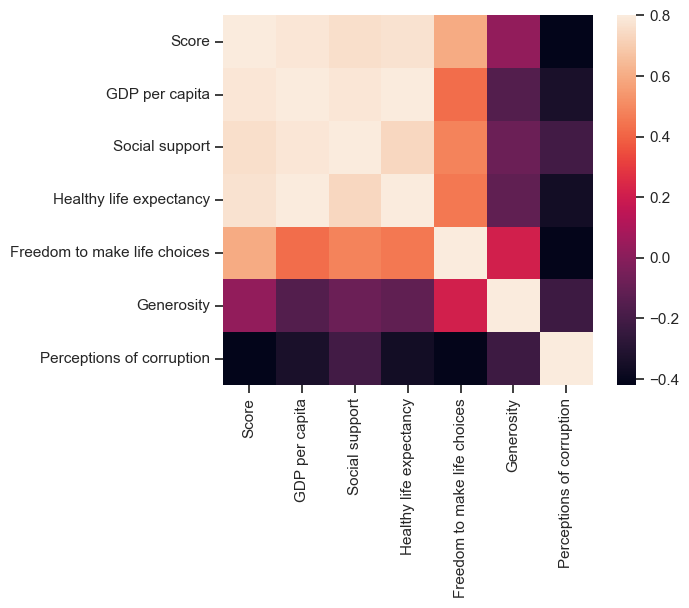

In [15]:
#Check correlation of each values 
corrmat = combined_countries_without_year.corr()
sns.heatmap(corrmat, vmax=.8, square=True)

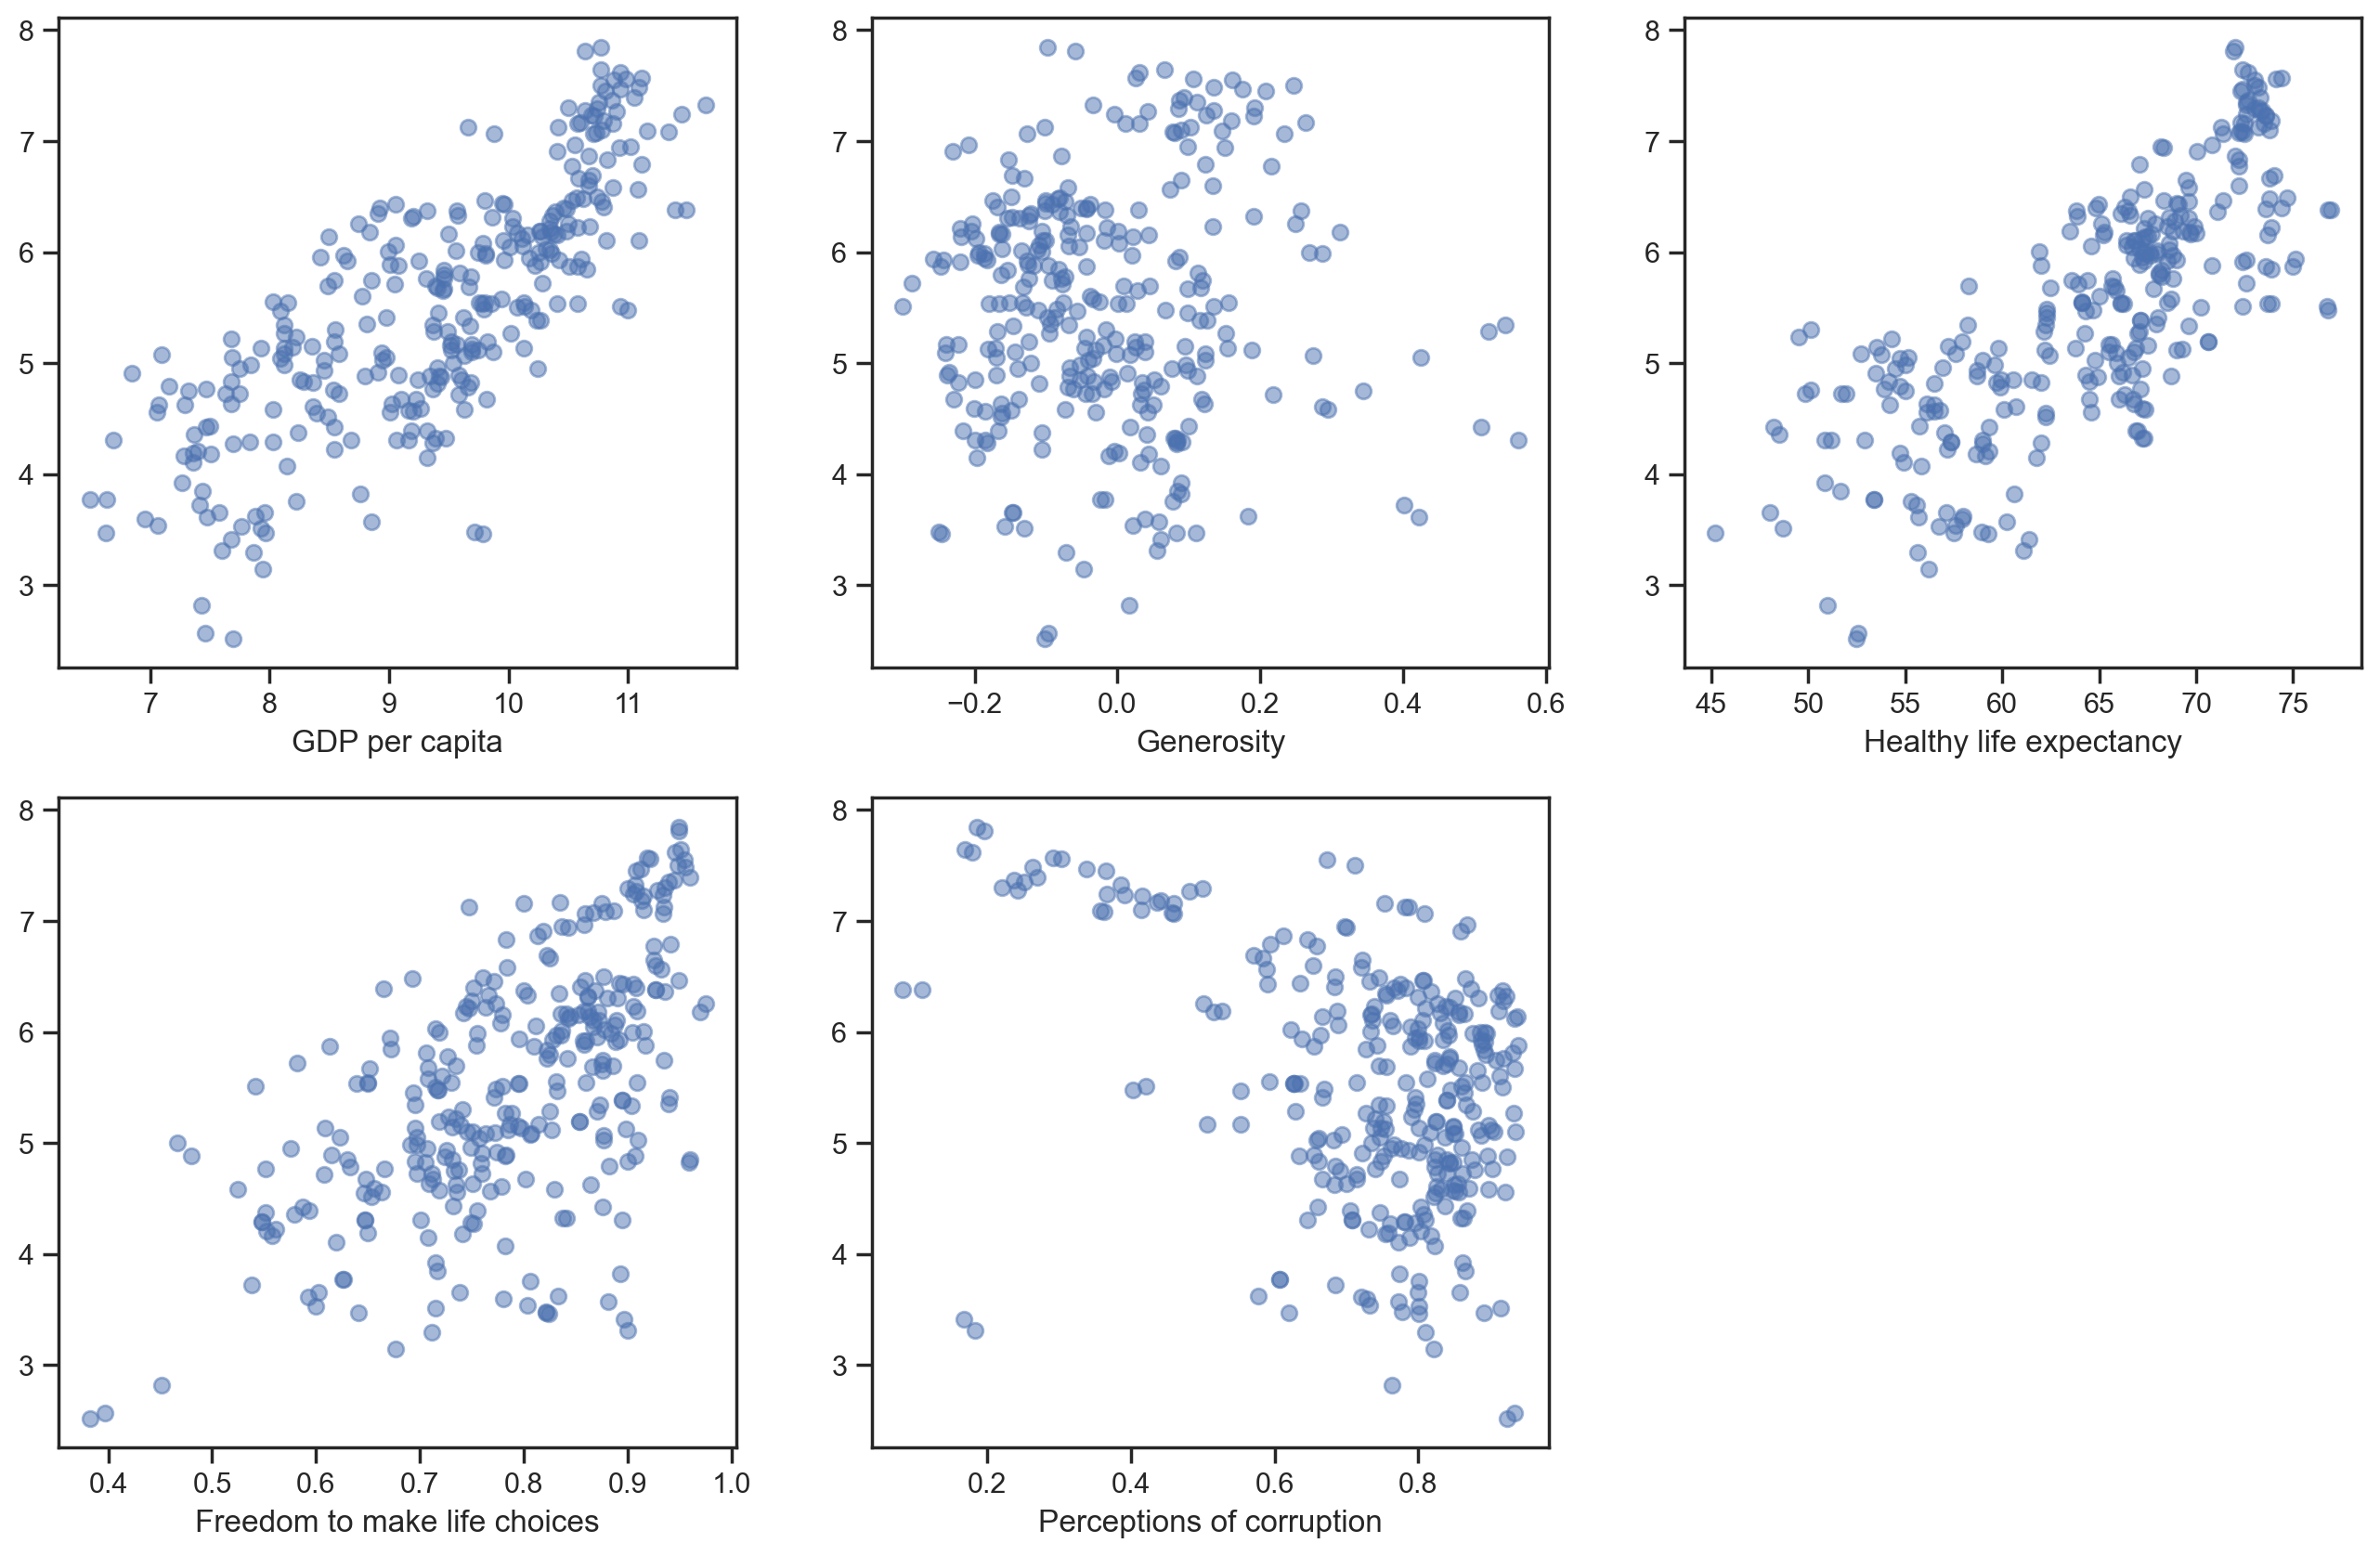

In [16]:
#let's check highly correlated columns separately 

%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(16, 10))
for i, key in enumerate(['GDP per capita', 'Generosity', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']):
    plt.subplot(2, 3, i+1)
    plt.xlabel(key)
    plt.scatter(combined_countries_without_year[key], combined_countries_without_year['Score'], alpha=0.5)

In [17]:

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot #loading necessary libraries for mapping
init_notebook_mode(connected=True)
import plotly

data = dict(type = 'choropleth',
           locations = combined_countries['Country or region'],
           locationmode = 'country names',
           z = combined_countries['Score'], 
           text = combined_countries['Country or region'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Global Happiness', 
             geo = dict(showframe = False, 
                       projection = {'type': 'eckert2'}))
fig = go.Figure(data = data, layout=layout)
plotly.offline.plot(fig) 
iplot(fig)